In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the xlsx file
data = pd.read_excel('double_auction_2023-02-03.xlsx', sheet_name = 'data')
transactions = pd.read_excel('double_auction_2023-02-03.xlsx', sheet_name = 'transactions')

Вычислим средние цены за каждый период и найдем количество сделок за период

In [75]:
def averagePricesAndDealsCount(data, transactions):
    transactionsByPeriod = [transactions[transactions['round_number'] == i] for i in range(1, 15)]
    pricesByPeriod = [transaction['price_correct'] for transaction in transactionsByPeriod]
    averagePrices = [np.average(prices) for prices in pricesByPeriod]
    dealsCount = [len(transaction) for transaction in transactionsByPeriod]
    return (averagePrices, dealsCount, pricesByPeriod)

(averagePrices, dealsCount, pricesByPeriod) = averagePricesAndDealsCount(data, transactions)

Для наглядности изобразим на графике

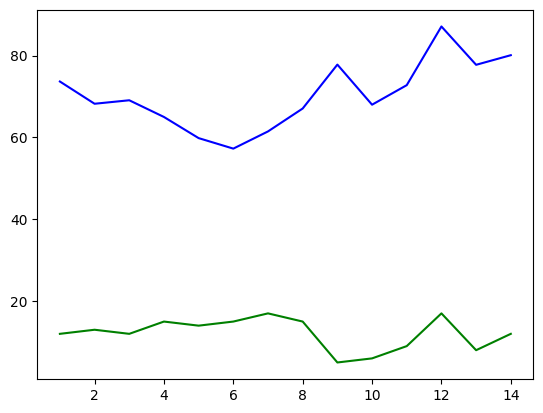

In [76]:
def makeGraph(averagePrices, dealsCount):
    x = range(1, 15)
    plt.plot(x, averagePrices,'b-', x , dealsCount,'g-')
    
makeGraph(averagePrices, dealsCount)

Какой-либо ярко выраженной закономерности для всего графика в целом не видно, можно лишь выделить расхождения ломаных на 6-10 периодах, а после 10, наоборот, ломаные будто повторяют движения друг друга

Теперь найдем распределение цен по периодам

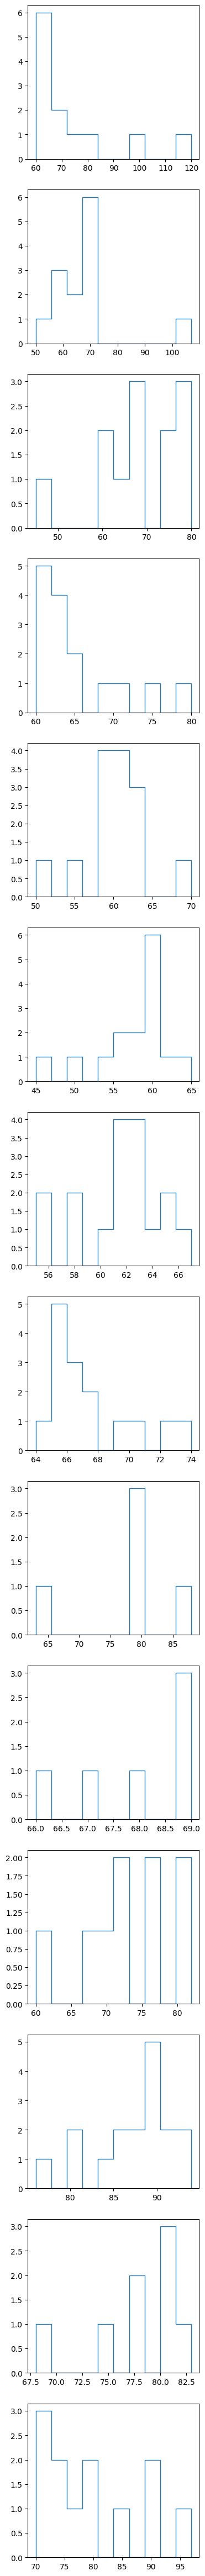

In [77]:
distribution = [np.histogram(prices, bins = 10) for prices in pricesByPeriod]
fig, axs = plt.subplots(len(distribution))
fig.set_size_inches(4, 60)

for i in range(len(distribution)):
    val, bins = distribution[i]
    axs[i].stairs(val, bins)
    
plt.show()

На некоторых гистограммах видно, где скапливаются цены, но отчетливой зависимости тактики от раунда не видно